In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('UsedCarsSA_Unclean_EN.csv')

In [2]:
df.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,Used,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,Used,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,Used,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,Used,41912,Riyadh,59500,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8248 non-null   object 
 1   Type         8248 non-null   object 
 2   Year         8248 non-null   int64  
 3   Origin       8153 non-null   object 
 4   Color        8248 non-null   object 
 5   Options      8139 non-null   object 
 6   Engine_Size  5982 non-null   float64
 7   Fuel_Type    8248 non-null   object 
 8   Gear_Type    8174 non-null   object 
 9   Condition    8248 non-null   object 
 10  Mileage      8248 non-null   int64  
 11  Region       8248 non-null   object 
 12  Price        8248 non-null   object 
 13  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(10)
memory usage: 845.9+ KB


In [4]:
df['Year'] =df['Year'].astype('datetime64[ns]').dt.year

In [5]:
df['Price'] =df['Price'].astype('float64')

ValueError: could not convert string to float: 'Negotiable'

In [6]:
x= df[df['Price'] == 'Negotiable']
x

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Condition,Mileage,Region,Price,Negotiable
1,Nissan,Patrol,1970,Saudi,White,Full,4.8,Gas,Automatic,Used,5448,Riyadh,Negotiable,True
7,GMC,Yukon,1970,Saudi,Bronze,Full,5.7,Gas,Automatic,Used,323000,Riyadh,Negotiable,True
19,GMC,Yukon,1970,Saudi,White,Full,5.3,Gas,Automatic,Used,37000,Riyadh,Negotiable,True
27,Toyota,Camry,1970,Saudi,Red,Full,2.5,Gas,Automatic,Used,8000,Makkah,Negotiable,True
29,Toyota,Avalon,1970,Other,Red,Full,NaN,Gas,Automatic,Used,169000,Riyadh,Negotiable,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,Mazda,CX9,1970,Saudi,Red,Standard,3.6,Gas,Automatic,Used,195000,Al-Medina,Negotiable,True
8234,Ford,Explorer,1970,Other,Black,Semi Full,1.6,Gas,Automatic,Used,3275230,Al-Baha,Negotiable,True
8235,Toyota,Furniture,1970,Saudi,White,Semi Full,2.7,Gas,Automatic,Used,82000,Makkah,Negotiable,True
8237,Toyota,Furniture,1970,Saudi,White,Semi Full,4.0,Gas,Automatic,Used,497480,Riyadh,Negotiable,True


In [7]:
df.loc[(df['Price'] == 'Negotiable'), 'Price'] = 0
df['Price'] = df['Price'].astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8248 entries, 0 to 8247
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8248 non-null   object 
 1   Type         8248 non-null   object 
 2   Year         8248 non-null   int32  
 3   Origin       8153 non-null   object 
 4   Color        8248 non-null   object 
 5   Options      8139 non-null   object 
 6   Engine_Size  5982 non-null   float64
 7   Fuel_Type    8248 non-null   object 
 8   Gear_Type    8174 non-null   object 
 9   Condition    8248 non-null   object 
 10  Mileage      8248 non-null   int64  
 11  Region       8248 non-null   object 
 12  Price        8248 non-null   float64
 13  Negotiable   8248 non-null   bool   
dtypes: bool(1), float64(2), int32(1), int64(1), object(9)
memory usage: 813.7+ KB


In [9]:
df =df.drop(columns=['Condition'])

In [10]:
Price_By_Make = (df.groupby('Make')['Price'].sum().sort_values(ascending=False)).head(11)
Price_By_Make

Make
Toyota        100277807.0
Mercedes       46303000.0
Lexus          40604200.0
Hyundai        32280825.0
Ford           30567807.0
Chevrolet      29976533.0
GMC            20247351.0
Nissan         18703084.0
Land Rover     18371500.0
BMW            12842400.0
Kia            11566131.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Total Price by Make')

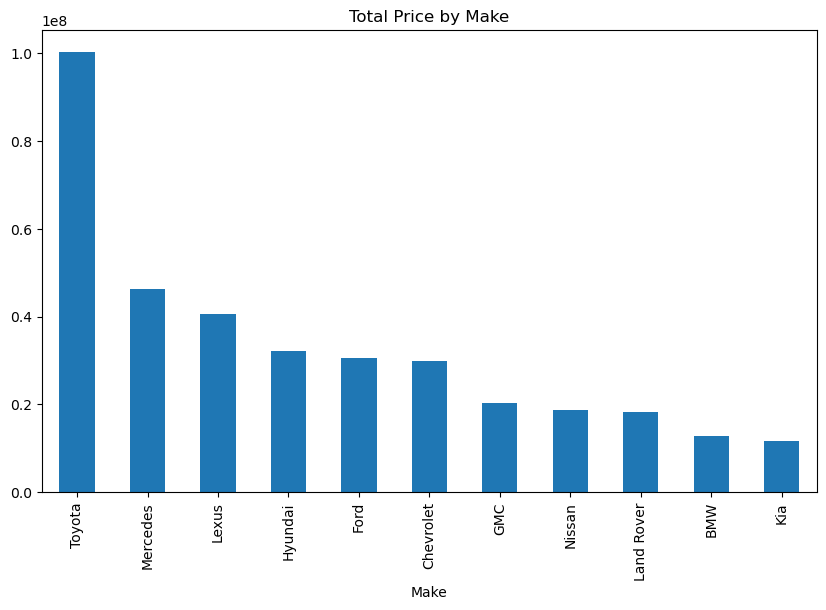

In [11]:
Price_By_Make.plot(kind='bar', figsize=(10, 6))
plt.title('Total Price by Make')  

In [12]:
Price_By_Type = (df.groupby(['Make', 'Type'])['Price'].sum().sort_values(ascending=False)).head(10)
Price_By_Type

Make        Type        
Toyota      Land Cruiser    30416360.0
Land Rover  Range Rover     17576500.0
Lexus       LX              17453500.0
Mercedes    S               15363000.0
Chevrolet   Tahoe           13804833.0
GMC         Yukon           12332601.0
Toyota      Hilux           11167723.0
Lexus       ES              10846200.0
Toyota      Camry           10815578.0
Ford        Taurus          10403508.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Total Price by Make and Type')

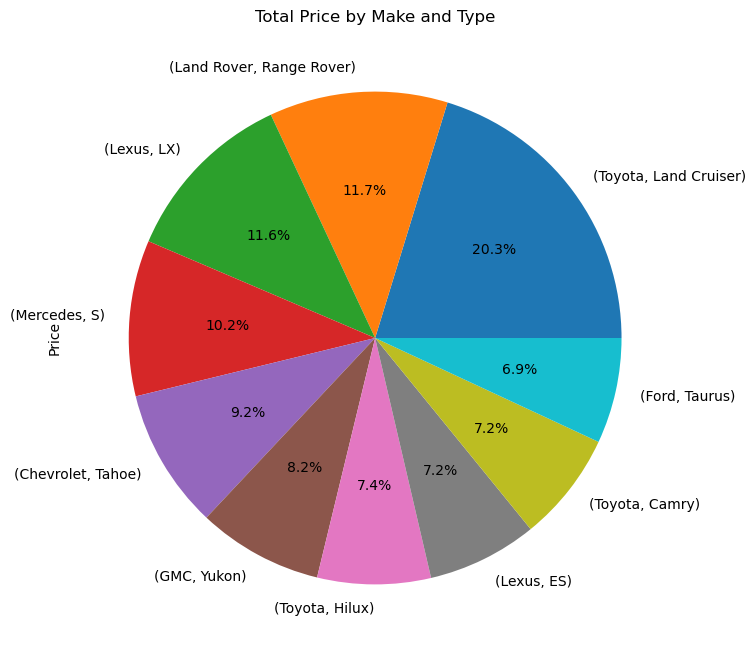

In [13]:
Price_By_Type.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Total Price by Make and Type')

In [14]:
df['Color'].value_counts()

Color
White            3574
Black             963
Silver            909
Grey              733
Another Color     547
Brown             329
Red               285
Blue              233
Golden            229
Bronze            164
Navy              164
Oily               53
Green              40
Yellow             15
Orange             10
Name: count, dtype: int64

In [15]:
Price_By_Color = (df.groupby('Color')['Price'].sum().sort_values(ascending=False)).head(10)
Price_By_Color

Color
White            184275694.0
Black             70838085.0
Grey              45626029.0
Silver            39372544.0
Another Color     28622932.0
Brown             15242585.0
Red               15039960.0
Blue              11225500.0
Navy              10791806.0
Bronze             9590326.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Total Price by Color')

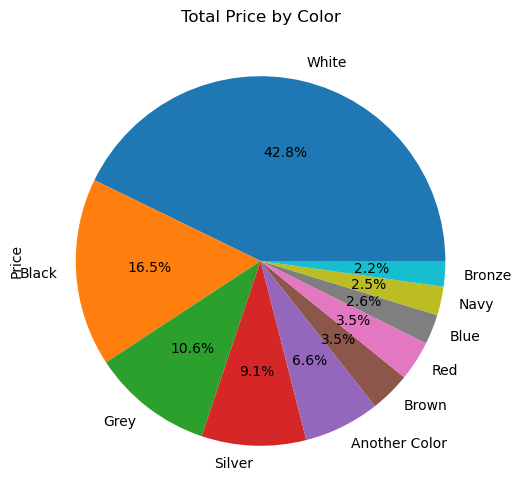

In [16]:
Price_By_Color.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%')
plt.title('Total Price by Color')

In [17]:
Price_By_Options = (df.groupby('Options')['Price'].sum().sort_values(ascending=False))
Price_By_Options

Options
Full         233403028.0
Standard     104407109.0
Semi Full    100735754.0
Name: Price, dtype: float64

Text(0.5, 1.0, 'Total Price by Options')

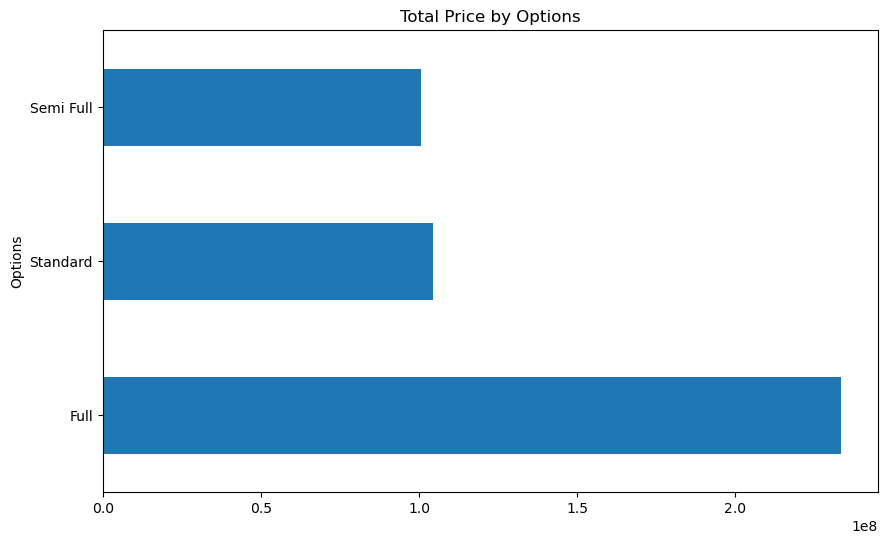

In [18]:
Price_By_Options.plot(kind='barh', figsize=(10, 6))
plt.title('Total Price by Options')

In [19]:
df['Engine_Size'].unique()

array([5.7, 4.8, 1.5, 1.6, 2. , 4.5, 3.6, 2.5, 5.6, 5.3, nan, 1.4, 4. ,
       2.4, 3.5, 3. , 2.6, 5.4, 3.8, 4.6, 4.3, 6. , 1. , 2.7, 3.3, 6.2,
       4.7, 8. , 7.5, 2.3, 3.7, 5. , 1.2, 8.8, 1.1, 1.8, 4.4, 2.8, 1.3,
       1.7, 5.5, 6.6, 6.4, 7. , 2.1, 3.2, 5.2, 3.1, 3.4, 5.8, 4.1, 6.5,
       9. , 4.2, 6.3, 8.9, 6.1, 2.2, 6.7, 8.1, 6.9, 4.9, 6.8, 2.9, 8.5,
       8.3, 7.4, 1.9, 7.9, 3.9, 5.1, 5.9, 8.7, 7.8, 8.2, 7.2])

In [20]:
bins = [0, 1.5, 2.5, df['Engine_Size'].max()]
labels = ['weak', 'medium', 'strong']

df['Level_Of_Engine'] = pd.cut(df['Engine_Size'], bins=bins, labels=labels)

In [21]:
Price_By_Engine = (df.groupby('Level_Of_Engine')['Price'].sum().sort_values(ascending=False))
Price_By_Engine

C:\Users\watan\AppData\Local\Temp\ipykernel_23968\1737890971.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Price_By_Engine = (df.groupby('Level_Of_Engine')['Price'].sum().sort_values(ascending=False))


Level_Of_Engine
strong    233450813.0
medium     93528551.0
weak       22760789.0
Name: Price, dtype: float64

<Axes: ylabel='Price'>

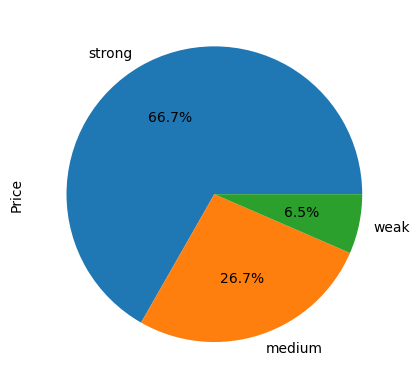

In [22]:
Price_By_Engine.plot(kind='pie', autopct='%1.1f%%')

In [23]:
Price_By_FuelType= (df.groupby('Fuel_Type')['Price'].sum().sort_values(ascending=False))
Price_By_FuelType

Fuel_Type
Gas       432472425.0
Diesel      9549197.0
Hybrid      1867195.0
Name: Price, dtype: float64

<Axes: xlabel='Fuel_Type'>

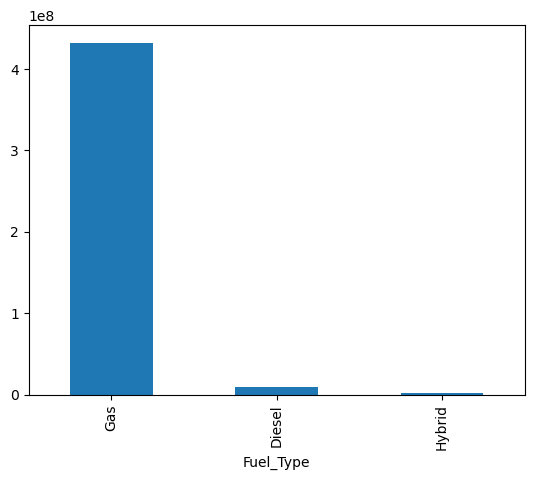

In [24]:
Price_By_FuelType.plot(kind='bar')

In [25]:
Price_By_GearType= (df.groupby('Gear_Type')['Price'].mean().sort_values(ascending=False))
Price_By_GearType

Gear_Type
Automatic    58209.220116
Manual       28236.262443
Name: Price, dtype: float64

<Axes: xlabel='Gear_Type'>

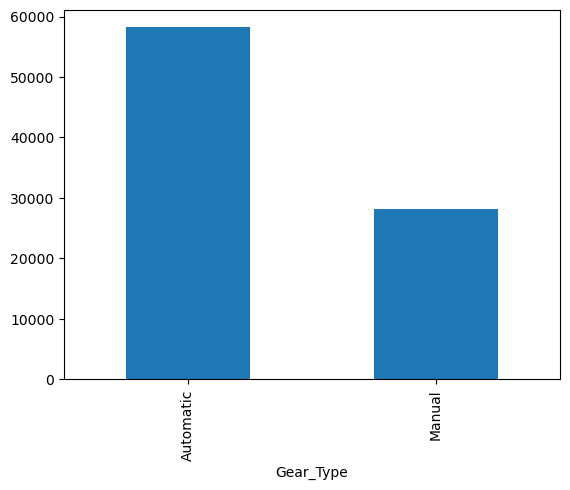

In [26]:
Price_By_GearType.plot(kind='bar')

In [27]:
bins = [df['Mileage'].min(), df['Mileage'].quantile(0.25), df['Mileage'].quantile(0.75), df['Mileage'].max()]
labels = ['low', 'medium', 'long']

df['Level_Of_Mileage'] = pd.cut(df['Mileage'], bins=bins, labels=labels)

In [28]:
Price_By_Mileage= (df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False))
Price_By_Mileage

Fuel_Type
Hybrid    77799.791667
Diesel    55197.670520
Gas       53716.609738
Name: Price, dtype: float64

<Axes: xlabel='Fuel_Type'>

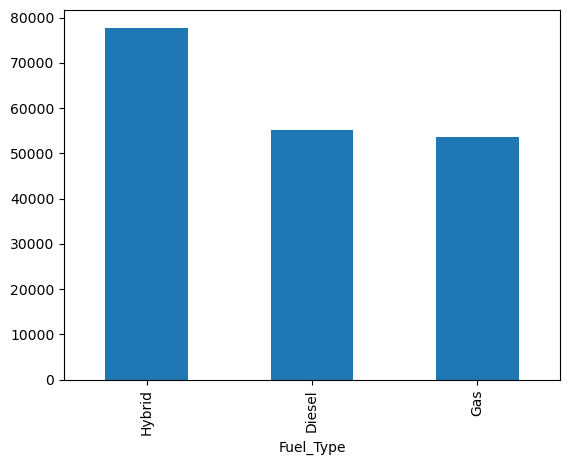

In [29]:
Price_By_Mileage.plot(kind='bar')

In [30]:
Price_By_Region= (df.groupby('Region')['Price'].sum().sort_values(ascending=False))
Price_By_Region 

Region
Riyadh            193070418.0
Dammam            107484745.0
Jeddah             60690631.0
Qassim             12024965.0
Al-Ahsa            10556588.0
Al-Medina          10143655.0
Makkah              9273080.0
Aseer               8693093.0
Khobar              4614462.0
Taef                4159790.0
Tabouk              3646695.0
Jazan               3538413.0
Jubail              2929849.0
Abha                2236010.0
Hail                1768404.0
Hafar Al-Batin      1554357.0
Al-Baha             1353000.0
Najran              1225254.0
Yanbu               1137000.0
Al-Jouf             1098824.0
Arar                 840584.0
Al-Namas             548000.0
Sakaka               342000.0
Besha                314000.0
Qurayyat             304000.0
Wadi Dawasir         289000.0
Sabya                 52000.0
Name: Price, dtype: float64

<Axes: xlabel='Region'>

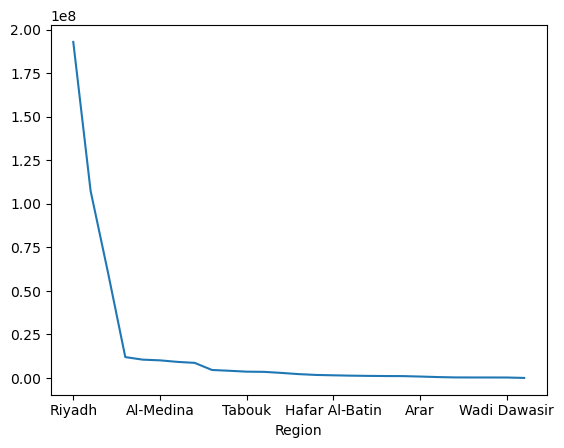

In [31]:
Price_By_Region.plot(kind='line')